In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


#DATA CLEANING AND PREPERATION

task 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/dataset.xlsx')

In [ ]:
df.head()

,Unnamed: 0,Year,Country,Region,Artist,Song,Artist.gender,Group.Solo,Place,Points,...,danceability,tempo,speechiness,key,liveness,time_signature,mode,loudness,valence,Happiness
0,1,2009,Lithuania,Former Socialist Bloc,Sasha Son,Love,Male,Solo,23,23,...,0.598360,102.984,0.027817,9.0,0.078643,3.0,0.0,-9.082,0.482059,6.148232
1,2,2009,Israel,Independent,Noa and Mira Awad,There Must Be Another Way,Female,Group,16,53,...,0.604542,105.972,0.024996,8.0,0.084805,4.0,1.0,-6.059,0.426209,5.141887
2,3,2009,France,Western Europe,Patricia Kaas,Et s'il fallait le faire,Female,Solo,8,107,...,0.367344,124.005,0.043751,1.0,0.923905,4.0,1.0,-8.655,0.292870,5.069762
3,4,2009,Sweden,Scandinavia,Malena Ernman,La voix,Female,Solo,21,33,...,0.513202,128.021,0.034855,10.0,0.143708,4.0,1.0,-4.536,0.206493,5.502692
4,5,2009,Croatia,Former Yugoslavia,Igor Cukrov feat. Andrea,Lijepa Tena,Both,Group,18,45,...,0.590592,116.107,0.032406,1.0,0.079322,4.0,0.0,-4.427,0.344541,NaN


In [ ]:
df.shape

(648, 30)

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Year,int64
Country,object
Region,object
Artist,object
Song,object
Artist.gender,object
Group.Solo,object
Place,int64
Points,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         648 non-null    int64  
 1   Year               648 non-null    int64  
 2   Country            648 non-null    object 
 3   Region             648 non-null    object 
 4   Artist             648 non-null    object 
 5   Song               648 non-null    object 
 6   Artist.gender      226 non-null    object 
 7   Group.Solo         226 non-null    object 
 8   Place              648 non-null    int64  
 9   Points             648 non-null    int64  
 10  Home.Away.Country  648 non-null    object 
 11  Home.Away.Region   648 non-null    object 
 12  Is.Final           648 non-null    int64  
 13  Semi.Final.Number  281 non-null    float64
 14  Song.In.English    648 non-null    int64  
 15  Song.Quality       648 non-null    float64
 16  Normalized.Points  648 non

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Year,0
Country,0
Region,0
Artist,0
Song,0
Artist.gender,422
Group.Solo,422
Place,0
Points,0


##handling misssing values

In [ ]:
df['Artist.gender'].isna().sum()

np.int64(422)

In [ ]:
df['Group.Solo'].isna().sum()

np.int64(422)

In [ ]:
df["Artist.gender"] = df["Artist.gender"].fillna("Unknown")
df["Group.Solo"] = df["Group.Solo"].fillna("Unknown")

In [ ]:
df['energy'] = df['energy'].fillna(df['energy'].median())

In [ ]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns  #to replace the null values of all numerical columns with their mean
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Year,0
Country,0
Region,0
Artist,0
Song,0
Artist.gender,0
Group.Solo,0
Place,0
Points,0


in columns :danceability ,tempo,speechiness etc.. there are <25% missing values ,so we imputate them


TASK2

In [ ]:
df["Artist.gender"].value_counts()

,count
Artist.gender,
Unknown,422
Female,101
Male,94
Both,31


In [ ]:
df["Group.Solo"].value_counts()

,count
Group.Solo,
Unknown,422
Solo,153
Group,73


In [59]:
df.groupby("Artist.gender")["Points"].mean()

,Points
Artist.gender,
Both,75.096774
Female,110.227723
Male,116.404255
Unknown,61.613744


male have tends to have more points in average

In [60]:
df.groupby("Group.Solo")["Points"].mean()

,Points
Group.Solo,
Group,96.712329
Solo,113.352941
Unknown,61.613744


solo have more points in average

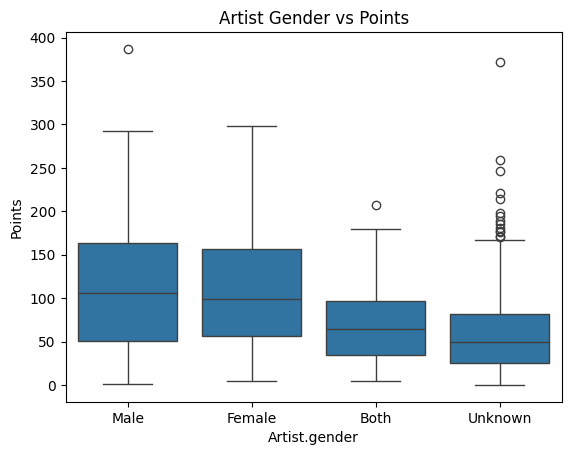

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(x="Artist.gender", y="Points", data=df)
plt.title("Artist Gender vs Points")
plt.show()

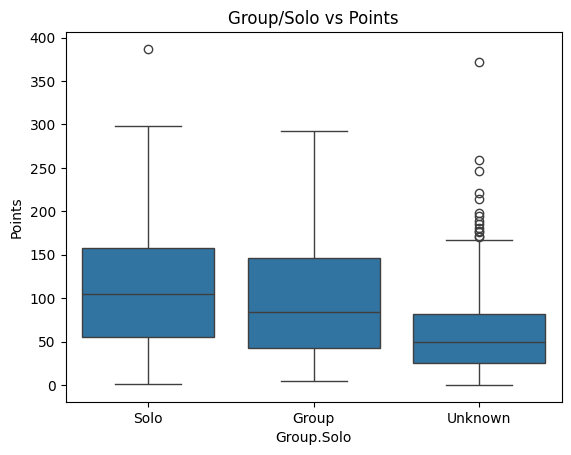

In [62]:
plt.figure()
sns.boxplot(x="Group.Solo", y="Points", data=df)
plt.title("Group/Solo vs Points")
plt.show()

task3
feature selection
deleting unwanted columns


In [63]:
df[["Happiness", "Points"]].corr()

,Happiness,Points
Happiness,1.000000,0.039515
Points,0.039515,1.000000


In [65]:
drop_cols = [
    "Unnamed: 0",
    "Happiness",
    "Semi.Final.Number" ]

df = df.drop(columns=drop_cols)

#EDA and Modelling

task4

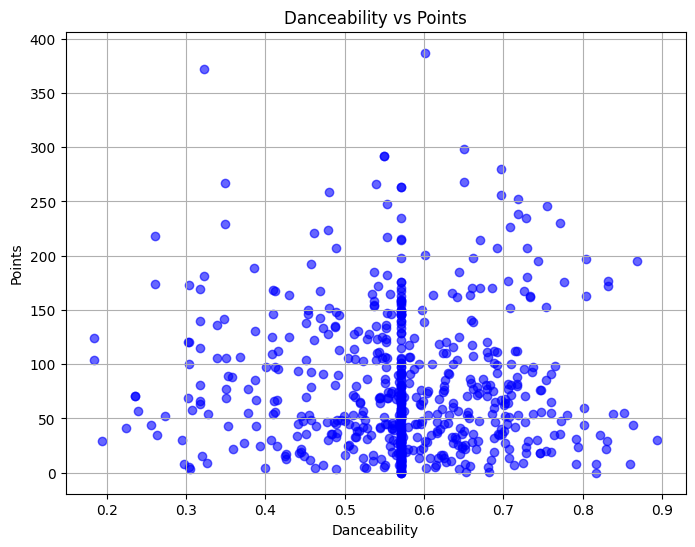

In [67]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["danceability"], df["Points"], color="blue", alpha=0.6)
plt.title("Danceability vs Points")
plt.xlabel("Danceability")
plt.ylabel("Points")
plt.grid(True)
plt.show()

task5

In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               648 non-null    int64  
 1   Country            648 non-null    object 
 2   Region             648 non-null    object 
 3   Artist             648 non-null    object 
 4   Song               648 non-null    object 
 5   Artist.gender      648 non-null    object 
 6   Group.Solo         648 non-null    object 
 7   Place              648 non-null    int64  
 8   Points             648 non-null    int64  
 9   Home.Away.Country  648 non-null    object 
 10  Home.Away.Region   648 non-null    object 
 11  Is.Final           648 non-null    int64  
 12  Song.In.English    648 non-null    int64  
 13  Song.Quality       648 non-null    float64
 14  Normalized.Points  648 non-null    float64
 15  energy             648 non-null    float64
 16  duration           648 non

In [76]:
df['Country'].nunique()

48

In [81]:


# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Option 1: Label Encoding (simple)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Option 2: One-Hot Encoding (if you prefer)
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

task6


In [82]:

# Features and target
X = df.drop('Points', axis=1)
y = df['Points']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred = gbr.predict(X_test)

# Evaluate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 5.77


the level of accuracy is strong and it is a good model for training


task7

In [89]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Assume gbr = your trained GradientBoostingRegressor
# Assume df = your training DataFrame
# Assume categorical_cols = list of categorical columns

# Save the trained Gradient Boosting model
with open("eurovision_gbr_model.pkl", "wb") as f:
    pickle.dump(gbr, f)

# Save the LabelEncoders for categorical columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])
    encoders[col] = le

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

print("Model and LabelEncoders saved successfully!")

Model and LabelEncoders saved successfully!


In [90]:
from google.colab import files

files.download("eurovision_gbr_model.pkl")
files.download("label_encoders.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>